# Dataviteskap arbeidskrav 5 


In [1220]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [1221]:

# Her bruker vi pandas til å lese inn dataene fra CSV-filene.

# Her lagrer vi filbanen til CSV_filen i en variabel.
filbane_alderfordeling  = 'aldersfordeling-for-innb.csv'       # A)
# pd.read_csv() er en funksjon i pandas som leser inn CSV-filer og lagrer dem som et datasett.
aldersfordeling_df = pd.read_csv(filbane_alderfordeling) 

# samme prosesen gjentar vi for de andre filene nedenfor.

filbane_innvandrerbg  = 'personer-med-innvandrerb.csv'      # B)
innvandrerbg_df = pd.read_csv(filbane_innvandrerbg)

filbane_jobb  = 'hva-innbyggerne-jobber-m.csv'         # C)
jobb_df = pd.read_csv(filbane_jobb)

filbane_utdaning  = 'hyeste-fullfrte-utdannin.csv'       # D)
utdaning_df = pd.read_csv(filbane_utdaning)

filbane_kultur  = 'hva-bruker-kommunen-kult.csv'       # E)
kultur_df = pd.read_csv(filbane_kultur)

filbane_utgifter  = 'utgifter-etter-utvalgte.csv'     # F)
utgifter_df = pd.read_csv(filbane_utgifter)

filbane_biler  = 'typer-av-biler-i-kommune.csv'     # G)
biler_df = pd.read_csv(filbane_biler)

filbane_aldersfordeling_tromsø  = 'aldersfordeling-for-innb-t.csv'
aldersfordeling_tromsø_df = pd.read_csv(filbane_aldersfordeling_tromsø)    # TA)

filbane_utdaning_tromsø  = 'hyeste-fullfrte-utdannin-t.csv'         # TU)
utdaning_tromsø_df = pd.read_csv(filbane_utdaning_tromsø)

filbane_jobb_tromsø  = 'hva-innbyggerne-jobber-m-t.csv'        # TJ)
jobb_tromsø_df = pd.read_csv(filbane_jobb_tromsø)


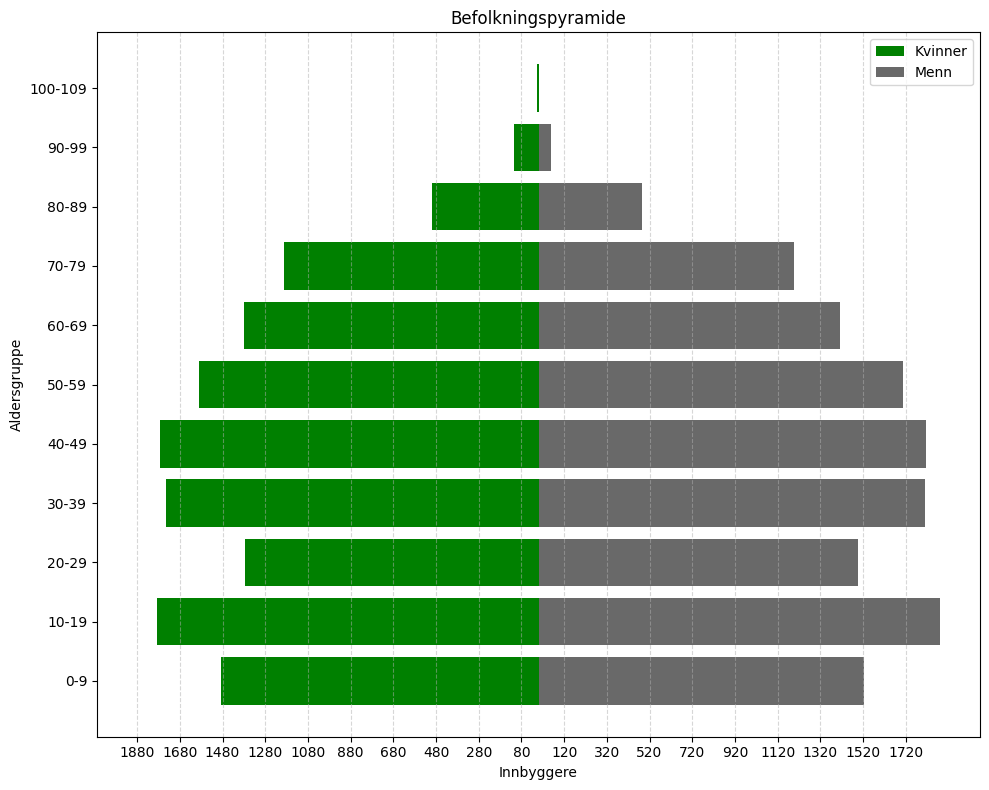

Kvinner: 12953
Menn: 13389
Totalt antall innbyggere: 26342


In [1222]:
# Les inn data her

# Her leser vi inn CSV-filen, og antar at kolonnene i datasettet er separert med semikolon.
df = pd.read_csv('aldersfordeling-for-innb.csv', sep=';')
# Gjør kvinnetall positive (de var orginalt negative i datasettet)
df['Kvinner'] = df['Kvinner'].abs()
# Her henter vi ut startaldersen fra tekst som eksempel "10-14 år" og gjør dem til tall (int), som eksempel 10
# str.extract() tar ut tallene fra teksten i kolonnen "Alder" og lagrer dem i en ny kolonne "Startalder", og astype(int) konverterer dem til heltall
df['Startalder'] = df['Alder'].str.extract(r'(\d+)').astype(int)
# Her lager vi aldersgrupper i 10-års intervaller, som eksempel "0-9", "10-19", osv
# (df['Startalder'] // 10 * 10) og (df['Startalder'] // 10 * 10 + 9), bruker vi for å finner start- og slutttallet for hvert intervall og slår dem sammen til tekst med bindestrek
# Vi bruker astype(str) for å konvertere tallene til strenger, altså vi gjør om tall som 30 og 39 til en streng som "30-39"
#  + '-' + setter inn en bindestrek mellom de to tallene
df['Aldersgruppe'] = (df['Startalder'] // 10 * 10).astype(str) + '-' + ((df['Startalder'] // 10 * 10 + 9).astype(str))

# Grupper og summer (her sorterer vi og summerer verdiene som er i selve stolpene i grafen).
# Det er altså her dataen til stolpene faktisk blir laget og lagret.

# Her grupperer vi datasettet etter aldersgruppe og summerer antall kvinner og menn i hver gruppe
# groupby('Aldersgruppe') grupperer radene etter hver aldersgruppe
# [['Kvinner', 'Menn']].sum() summerer verdiene i kolonnene 'Kvinner' og 'Menn' for hver gruppe 
# reset_index() gjør gruppen vi har gruppert på om til en vanlig kolonne igjen, slik at det blir lettere å jobbe videre med datasettet etter summeringene.
gr = df.groupby('Aldersgruppe')[['Kvinner', 'Menn']].sum().reset_index()
# Denne linjen henter ut starttallet fra hver aldersgruppe, f.eks "30-39" blir til 30, sånn at vi kan sortere dem i riktig rekkefølge
# str.extract(r'(\d+)') finner det første tallet i strengen (f.eks. "30-39" → 30), og astype(int) konverterer det til heltall
gr['Sortering'] = gr['Aldersgruppe'].str.extract(r'(\d+)').astype(int)
# Her sorterer vi radene i datasettet etter aldersgruppen, sånn at de kommer i riktig rekkefølge
gr = gr.sort_values('Sortering')
# gr er datasettet som inneholder aldersgrupper og antall kvinner og menn i hver gruppe

# Plot

# Lager vi en figur og akse (ax) for plottet, på størrelse 10x8 tommer
fig, ax = plt.subplots(figsize=(10, 8))
# Her legger vi til en horisontale stolpe (barh) i plottet, stolpen er for kvinner med negativ verdier sånn at de visses på venstre siden av plottet
ax.barh(gr['Aldersgruppe'], -gr['Kvinner'], color='green', label='Kvinner')
# Her legger vi til en horisontale stolpe (barh) i plottet, stolpen er for menn med positive verdier sånn at de visses på høyre siden av plottet
ax.barh(gr['Aldersgruppe'], gr['Menn'], color='dimgray', label='Menn')

# Her henter vi ut det høyeste tallet i hver aldersgruppe for å finne ut hvor langt vi skal gå på x-aksen
# gr['Kvinner'].max() finner det største tallet i kolonnnen for kvinner, og gr['Menn'].max() gjør det samme bare for menn
# max() finner den største verdien blant menn og kvinner, og setter det som grensen for x-aksen og lagrer det i variabelen max_val
max_val = max(gr['Kvinner'].max(), gr['Menn'].max())
# ax.set_xlime setter x-aksens start og slutt 
# max_val er den største verdien fra enten menn eller kvinner, som vi fant i den tidligere linjen
# vi ganger max_val med 1.1 for å gi ekstra plass på hver side av grafen, sånn at stolpen ikke går helt ut til kanten
# -max_val gjør det samme bare på venstre side ab grafen, siden verdiene er negative 
ax.set_xlim(-max_val * 1.1, max_val * 1.1)
# ax.set_xticks setter hvor ofte det skal vises tall på x-aksen som i dette tilfeldet er 200 
# (range(-int(max_val), int(max_val) + 1, 200)) gjør sånn at vi starter på venstresiden (negative verdier) til høyresiden (positive verdier) langs x-aksen, hvor verdiene øker med 200 
# + 1 gjør sånn at maksverdien også kommer med i tallen ved x-aksen 
ax.set_xticks(range(-int(max_val), int(max_val) + 1, 200))
# her gjør vi om alle tallene på x-aksen positive ved å bruke abs(x), selv om grafen har negative verdier for kvinner, vises verdiene som positiv for bedre lesbarhet
ax.set_xticklabels([abs(x) for x in ax.get_xticks()])

# Her velger vi hva som skal stå på x-aksen og y-aksen, samt tittel på grafen
ax.set_xlabel('Innbyggere') 
ax.set_ylabel('Aldersgruppe')
ax.set_title('Befolkningspyramide')
# Her velger vi hvor legenden skal plasseres i plottet
ax.legend(loc='upper right')
# True aktiverer rutenett i plottet, og axis='x' gjør sånn at rutenettet bare vises opp langs x-aksen, mens linestyle='--' gjør sånn at linjene blir striplete, tilslutt gjør alpha=0.5 sånn at linjene blir litt gjennomsiktige
ax.grid(True, axis='x', linestyle='--', alpha=0.5)
# plt.tight_layout() gjør sånn at ingen ting i plottet overlapper med hverandre
plt.tight_layout()
# Her viser vi plottet
plt.show()

# Summer og skriv ut

# Her bruker vi .sum() for å summere totalet antall kvinner i datasettet
kvinner = gr['Kvinner'].sum()
# Her gjør vi det samme som den tidligere linjen bare for menn
menn = gr['Menn'].sum()
# Her summerer vi antall kvinner og menn i hele datasettet
totalt = kvinner + menn

# Her skriver vi ut antall kvinner, menn og totalt antall innbyggere i datasettet med tekst£
print(f"Kvinner: {kvinner}")
print(f"Menn: {menn}")
print(f"Totalt antall innbyggere: {totalt}")

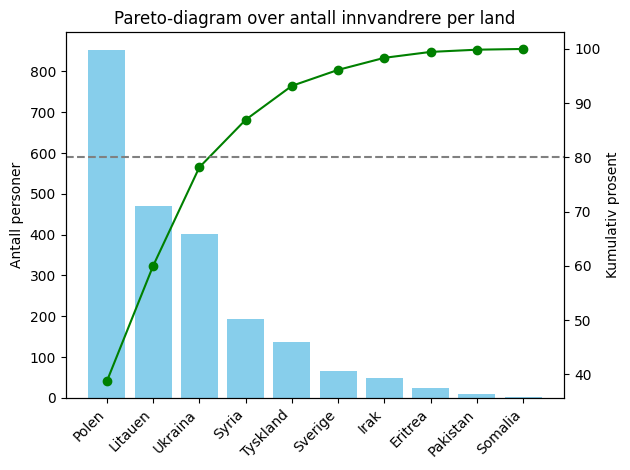

In [1223]:
# oppgave 2)

# Her bruker vi pandas til å lese inn dataene fra CSV-filen, og lagrer det i et datasett
innvandrerbg_df = pd.read_csv(filbane_innvandrerbg, sep=';')

# Rens kolonnenavn
innvandrerbg_df.columns = innvandrerbg_df.columns.str.strip()

# Sorter etter antall
df_sorted = innvandrerbg_df.sort_values(by='2025', ascending=False)

# Kumulativ prosent
df_sorted['Kumulativ prosent'] = df_sorted['2025'].cumsum() / df_sorted['2025'].sum() * 100

# Lag Pareto-diagram
fig, ax1 = plt.subplots()

# Stolpediagram
ax1.bar(range(len(df_sorted)), df_sorted['2025'], color='skyblue')
ax1.set_ylabel('Antall personer')
ax1.set_xticks(range(len(df_sorted)))  # Fikser advarsel
ax1.set_xticklabels(df_sorted['Land'], rotation=45, ha='right')

# Kumulativ kurve
ax2 = ax1.twinx()
ax2.plot(range(len(df_sorted)), df_sorted['Kumulativ prosent'], color='green' , marker='o')
ax2.set_ylabel('Kumulativ prosent')
ax2.axhline(y=80, color='gray', linestyle='dashed')

# Tittel og layout
plt.title('Pareto-diagram over antall innvandrere per land')
plt.tight_layout()
plt.show()

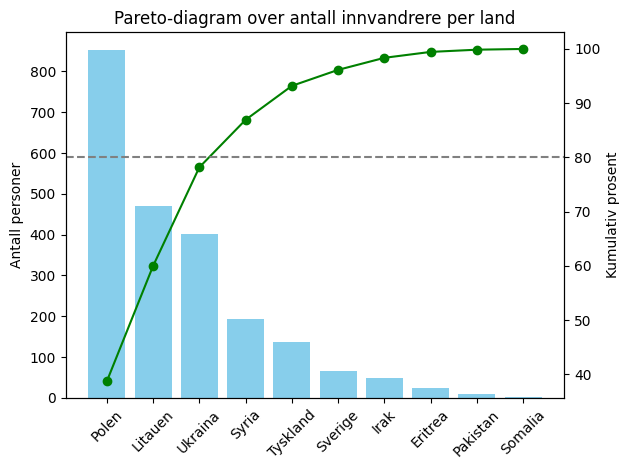

In [1224]:
# oppgave 2)

# Her bruker vi pandas til å lese inn dataene fra CSV-filen, og lagrer det i et datasett
innvandrerbg_df = pd.read_csv(filbane_innvandrerbg, sep=';')

# Her sorterer vi datasettet etter antall innvandrere i 2025, fra høyeste til laveste, og lagrer det i df_sorted
df_sorted = innvandrerbg_df.sort_values(by='2025', ascending=False)

# Her regner vi ut den kumalative prosentandelen 
# cumsum() legger til verdiene i datasette en etter en i rekkefølge
# sum() finner totalen av alle verdiene i datasettet
# Tilslutt ganger vi den løpende total summen med 100 for å få prosent
df_sorted['Kumulativ prosent'] = df_sorted['2025'].cumsum() / df_sorted['2025'].sum() * 100

# Her lager vi et nytt tomt plot, for å lage Pareto-diagramet 
fig, ax1 = plt.subplots()


# her lager vi stolpene for hver rad i df_sorted, høydene til stolpene bestemmes av verdiene i kolonnen '2025' 
ax1.bar(range(len(df_sorted)), df_sorted['2025'], color='skyblue')
# Her legger vi til tekst ved y-aksen 
ax1.set_ylabel('Antall personer')
# Fikser advarsel
ax1.set_xticks(range(len(df_sorted)))  
# Her rotterer vi teksten ved x-aksen 45 grader, sånn at den blir lettere å lese
ax1.set_xticklabels(df_sorted['Land'], rotation=45)

# Kumulativ kurve
# Her legger vi til en ekstra y-akse til plottet, sånn at vi kan vise den kumulative prosentandelen
ax2 = ax1.twinx()
# Her lager vi den grønne kurven som viser den kumulative prosentandelen
# range(len(df_sorted)) lager en liste med tall: 0,1,2,3 osv. som brukes til å plassere punktene langs x-aksen, hver av disse representerer posisijonen til et land på x-aksen, f.eks. 0 = første landet, 1 = andre landet osv.
# df_sorted['Kumulativ prosent'] er verdiene for den kumulative prosentandelen som vi lagde tidligere, som vi bruker til å lage kurven, den blir tegnet med grønne punkter og linjer
# kurven viser f.eks. 40% av den totale summen innvandrerne kommer fra 0 = Polen, så når vi går vidre til 1 = Litauen stiger prosenandelen til 60% 
ax2.plot(range(len(df_sorted)), df_sorted['Kumulativ prosent'], color='green' , marker='o')
# Her legger vi til tekst ved den nye y-aksen
ax2.set_ylabel('Kumulativ prosent')
# Her lager vi en horisontal stiplet linje ved 80% på den nye y-aksen, sånn at vi kan se hvor mange land som står for 80% av den total summen innvandrerne
# Dette er et vanlig prinsip i pareto-diagrammer, som kalles 80/20 regelen
ax2.axhline(y=80, color='gray', linestyle='dashed')

# Tittel og layout
# Her legger vi til tittel på plottet
plt.title('Pareto-diagram over antall innvandrere per land')
# Her gjør vi sånn at plottet blir pent og ryddig, uten overlappende tekst og elementer
plt.tight_layout()
# Her viser vi plottet
plt.show()

# kort forklaring av grafen:
Grafen er et pareto-diagram som viser antall personer med innvandrerbakgrunn, fordelt på ulike land.

* De blå stolpene viser anttal personer fra de ulike landene

* Den grønne linjen viser den kumlative prosentandeln, altså hvor mange prosent av den totale summen vi har lagt sammen så langt 


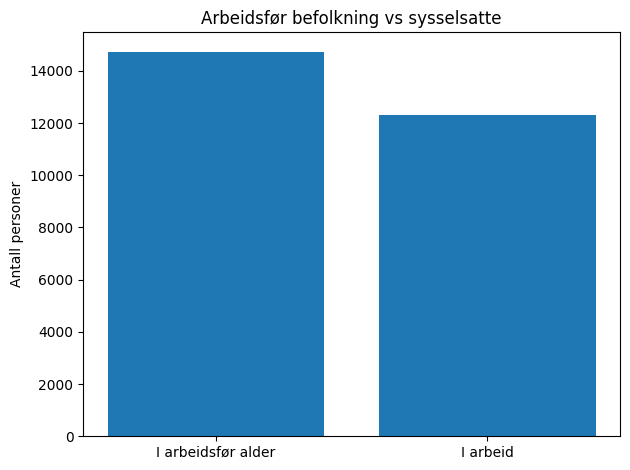

Totalt antall personer i arbeidsfør alder 20-65: 14737
I arbeid: 12289
Utenfor arbeid: 2448 (16.6%)


In [1225]:
# oppgave 3)
# mangler kort besvarelse 

# Her bruker vi pandas til å lese inn dataene fra CSV-filen, og lagrer det i et datasett
aldersfordeling_df = pd.read_csv('aldersfordeling-for-innb.csv', sep=';')
# Konverter tall til positive og numeriske
# Her gjør vi sånn at atllene i kolonnene 'Kvinner' og 'Menn' blir positive og numeriske
aldersfordeling_df['Kvinner'] = pd.to_numeric(aldersfordeling_df['Kvinner']).abs()
aldersfordeling_df['Menn'] = pd.to_numeric(aldersfordeling_df['Menn']).abs()

# Her filtrerer vi etter arbeidsfør alder, som er 20-64 år
# Her lager vi en liste med aldersgrupper som vi vil inkludere i beregningen
aldersgrupper = ['20-24 år','25-29 år','30-34 år','35-39 år','40-44 år','45-49 år','50-54 år','55-59 år','60-64 år']
# her filtrerer vi datasettet sånn at vi bare får med aldersgrupper som er i listen over
arbeidsfor_total = aldersfordeling_df[aldersfordeling_df['Alder'].isin(aldersgrupper)][['Kvinner','Menn']].sum().sum()

# Her laster vi innn jobbtallen fra CSV-filen, og lagrer det i et datasett
jobb_df = pd.read_csv('hva-innbyggerne-jobber-m.csv', sep=';')
# jobb_df.colums gjør sånn at vi kan endre kolonnenavnene i datasettet
jobb_df.columns = ['Næring', 'Antall']
# Her gjør vi sånn at tallene i kolonnen 'Antall' blir positive og numeriske, errors='coerce' gjør sånn at hvis det er noe feil med å konvertere til tall, så blir det til NaN (Not a Number)
jobb_df['Antall'] = pd.to_numeric(jobb_df['Antall'], errors='coerce')
# her lager et datasett som innholder totalt antall personer i arbeid, ved å summere alle verdiene i kolonnen 'Antall'
antall_i_arbeid = jobb_df['Antall'].sum()

# Estimer utenfor arbeid
# her lager vi et datasett som inneholder personer utenfor arbeid, ved å trekke antall personer i arbeid fra arbeidsfør befolkning
utenfor = arbeidsfor_total - antall_i_arbeid
# Her lager vi en variabel som inneholder prosentandelen av personer utenfor arbeid i forhold til arbeidsfør befolkning
prosent_utenfor = 100 * utenfor / arbeidsfor_total

# Plott
# Her lager vi et stolpediagram med to søyler, en for arbeidsfør befolkning og en for personer i arbeid
plt.bar(['I arbeidsfør alder', 'I arbeid'], [arbeidsfor_total, antall_i_arbeid])
# her legger vi til en tittel til plottet
plt.title('Arbeidsfør befolkning vs sysselsatte')
# her legger vi til tkesten som vises ved y-aksen
plt.ylabel('Antall personer')
# dette gjør sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# Her viser vi plottet
plt.show()

# Her skriver vi ut resultatene
print(f"Totalt antall personer i arbeidsfør alder 20-65: {arbeidsfor_total}")
print(f"I arbeid: {antall_i_arbeid}")
print(f"Utenfor arbeid: {utenfor} ({prosent_utenfor:.1f}%)")

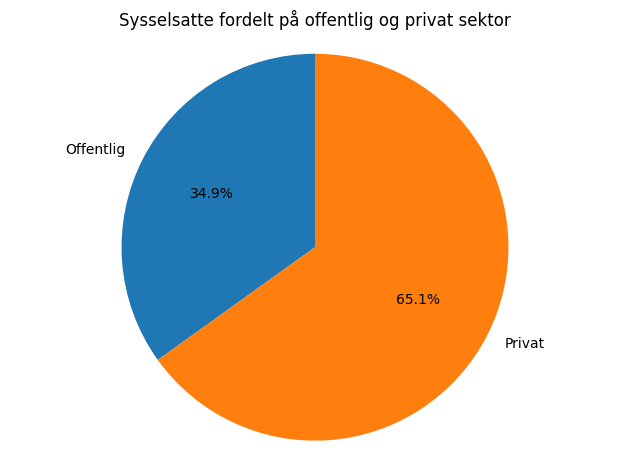

In [1226]:
# oppgave 3)

# Her lages en liste med navn på næringer som skal regnes som offentlig sektor
offentlige = ['Helse- og sosialtjenester', 'Undervisning', 'Off.adm., forsvar, sosialforsikring']

# Her lager vi en ny kolonne (sektor) som sier om en person jobber i offentlig eller privat sektor
# her går vi gjennom alle rader i kolonnen 'Næring', hvis næringen finnes i listen offentlig sektor, så får den verdien 'Offentlig' og viss ikke regnes den som 'Privat'
jobb_df['Sektor'] = jobb_df['Næring'].apply(lambda x: 'Offentlig' if x in offentlige else 'Privat')

# Her summerer vi antall sysselsatte i offentlig og privat sektor
# dette grupperer dataene etter sektor og summerer antall personer i hver sektor
sektor_sum = jobb_df.groupby('Sektor')['Antall'].sum()

# Her lager vi kakediagrammet
# sektor_sum: verdiene som skal vises i kakediagrammet
# labels=sektor_sum.index: navnene på sektorene som skal vises i kakediagrammet
# autopct='%.1f%%': viser prosentandelen med 1 desimal
# startangle=90: starter kakediagrammet på 90 grader, sånn at kaken starter fra toppen
plt.pie(sektor_sum, labels=sektor_sum.index, autopct='%.1f%%', startangle=90)
# Her lager vi en tittel til kakediagrammet
plt.title('Sysselsatte fordelt på offentlig og privat sektor')
# dette gjør gjør plotet rund og pent
plt.axis('equal') 
# Det dett gjør sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# Her viser vi plottet
plt.show()

In [1227]:
# oppgave 4)
# legg til en besvarelse for oppgave 4)

# her lager vi et nytt datasett som inneholder dataene fra CSV-filen, med semikolon som skilletegn
utdaning_df = pd.read_csv('hyeste-fullfrte-utdannin.csv', sep=';')
# her renser vi kolonnenavnene i datasettet, fjerner mellomrom og spesialtegn
utdaning_df.columns = ['Utdanningsnivå', 'Antall']
# Her gjør vi sånn at atllene i kolonnen 'Antall' blir positive og numeriske, errors='coerce' gjør sånn at hvis det er noe feil med å konvertere til tall, så blir det til NaN (Not a Number)
utdaning_df['Antall'] = pd.to_numeric(utdaning_df['Antall'], errors='coerce')

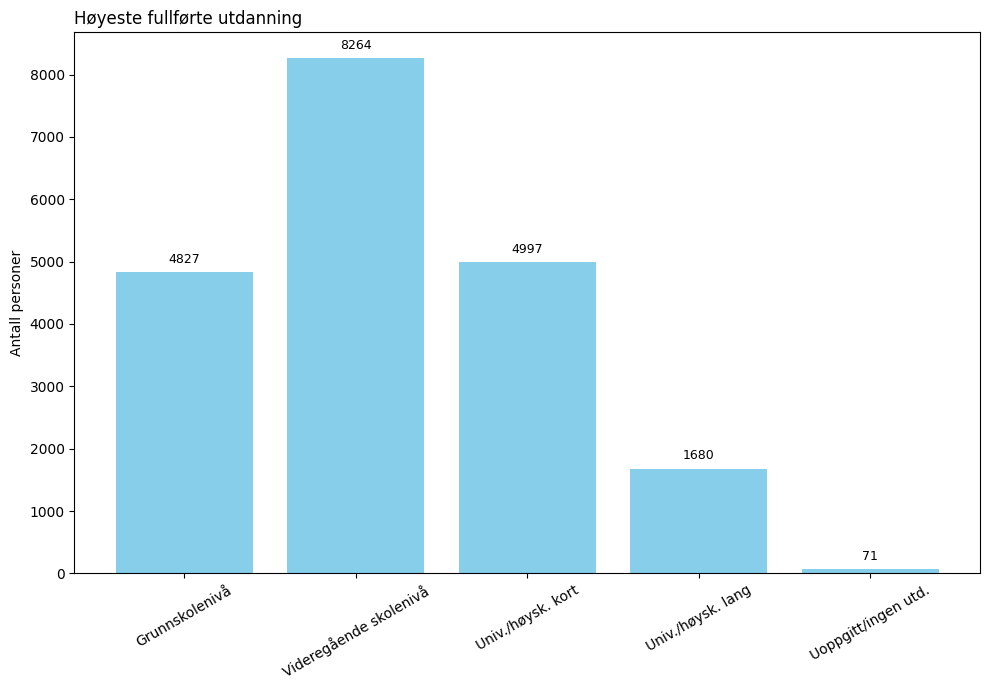

In [1228]:
# oppgave 4)

# Her forkorter vi navn som skal vises i plottet, sånn at de ikke blir for lange og overlapper med hverandre
# replace() brukes til å erstatte lange navn med kortere navn, sånn at de blir lettere å lese i plottet
utdaning_df['Label'] = utdaning_df['Utdanningsnivå'].replace({
    'Universitets- og høgskolenivå, kort': 'Univ./høysk. kort',
    'Universitets- og høgskolenivå, lang': 'Univ./høysk. lang',
    'Uoppgitt eller ingen fullført utdanning': 'Uoppgitt/ingen utd.'
})

# # her lager vi et søylediagram 
# plt.figure() lager et nytt plott med en størrelse på 10x7 tommer
plt.figure(figsize=(10, 7))
# plt.bar() lager stolpene i plottet, der x-aksen er utdanningsnivå og y-aksen er antall personer, og lagreres i variabelen bars for vidre bruk
bars = plt.bar(utdaning_df['Label'], utdaning_df['Antall'], color='skyblue')

# Legg til tall over stolpene
# Her går vi gjennom hver stolpe i plottet og legger til teksten over dem
# bar.get_height() henter høyden (verdien) til hver stolpene
# get_x() og get_width() brukes til å finne posisjonen til stolpen, sånn at teksten blir plassert rett over stolpen
# yval + 100: plasserer teksten litt over stolpen, sånn at den ikke overlapper med selve stolpen
# f'{int(yval)}': viser verdien som et heltall
# ha='center' og va='bottom' plasserer teksten midt over stolpen
# fontsize=9: gjør teksten litt mindre sånn at den ikke blir for stor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{int(yval)}', ha='center', va='bottom', fontsize=9)

# her legger vi til tekst ved y-aksen
plt.ylabel('Antall personer')
# her rotterer vi teksten ved x-aksen 30 grader, sånn at den blir lettere å lese
plt.xticks(rotation=30)
# her legger vi til en tittel til plottet, loc='left' gjør sånn at teksten blir plassert til venstre i plottet, frontsize=12 gjør sånn at teksten blir litt større
plt.title('Høyeste fullførte utdanning', loc='left', fontsize=12)
# dette gjør sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# Dette viser frem plottet
plt.show()

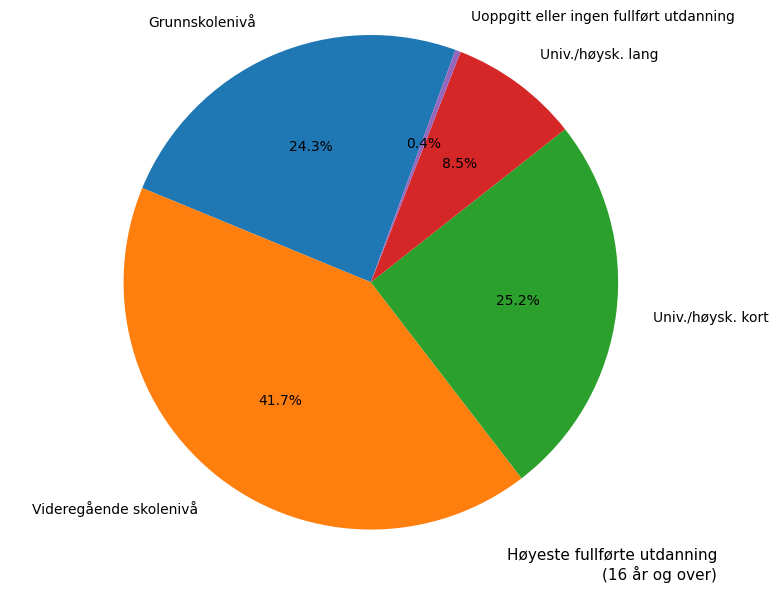

In [1229]:
# oppgave 4)

# Her forkorter vi navn som skal vises i plottet, sånn at de ikke blir for lange og overlapper med hverandre
# replace() brukes til å erstatte lange navn med kortere navn, sånn at de blir lettere å lese i plottet
utdaning_df['Label'] = utdaning_df['Utdanningsnivå'].replace({
    'Universitets- og høgskolenivå, kort': 'Univ./høysk. kort',
    'Universitets- og høgskolenivå, lang': 'Univ./høysk. lang'
})

# Lag kake med label-distance og bedre layout
# plt.figure() lager et nytt plott med en størrelse på 8x6 tommer
# plt.pie() lager kakediagrammet
# der utdaning_df['Antall'] er verdiene som skal vises i kakediagrammet
# og utdaning_df['Label'] er navnene på sektorene som skal vises i kakediagrammet
# autopct='%.1f%%' viser prosentandelen med 1 desimal
# startangle=70: starter kakediagrammet på 70 grader
# labeldistance=1.15: flytter teksten litt ut fra sentrum av kaken
# pctdistance=0.60: flytter prosentandelen nærmere sentrum av kaken
# textprops={'fontsize': 10}: bestemmer fontstørrelsen på teksten
plt.figure(figsize=(8, 6))
plt.pie(
    utdaning_df['Antall'],
    labels=utdaning_df['Label'],
    autopct='%.1f%%',
    startangle=70,
    labeldistance=1.15,     # Flytt tekst litt ut
    pctdistance=0.60,       # Flytt prosent nærmere senter
    textprops={'fontsize': 10}
)

# Legg til tittel nederst til høyre
# ha='right' plasserer teksten til høyre
# fontsize=11 gjør sånn at teksten blir litt større
plt.text(1.4, -1.2, 'Høyeste fullførte utdanning\n(16 år og over)', ha='right', fontsize=11)

# Dette sørger for at kaken blir rund
plt.axis('equal')
# dette gjør sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# Dette viser frem plottet
plt.show()

In [1230]:
# oppgave 5)

# leser inn CSV-filen og lagrer det i et datasett, og antar at kolonnene i datasettet er separert med semikolon
kultur_df = pd.read_csv("hva-bruker-kommunen-kult.csv", sep=";")

# Her henter vi verdiene i kolonnen "2024"
# sum() summerer alle verdiene i kolonnen "2024" og lagrer det i en variabel (kulturbudsjett)
kulturbudsjett = kultur_df["2024"].sum()

# Her skriver vi ut kulturbudsjettet i lesbar tekst 
# f-strenge brukes til å formatere teksten, sånn at vi kan sette inn variabler i teksten
print(f"Kulturbudsjettet totalt: {kulturbudsjett} tusen kr")

Kulturbudsjettet totalt: 1645 tusen kr


In [1231]:
# oppgave 5)

# Filtrer rader som handler om idrettsanlegg
# Her bruker vi str.contains() for å finne alle rader som inneholder ordet "idrettsbygg" i kolonnen "Tjenesteområde"
# case=False gjør sånn at det ikke spiller noen rolle om bokstavene er store eller små
# na=False gjør sånn at NaN (manglende verdi) ikke gir feil
# resultatet lagres i et nytt datasett (idrettsbygg_df)
idrettsbygg_df = kultur_df[kultur_df["Tjenesteområde"].str.contains("idrettsbygg", case=False, na=False)]

# Denne linjen summerer alle verdiene i kolonnen "2024" for de filtrerte radene
# resultatet er det totale beløpet for idrettsbygg og anlegg
idrettsbygg_sum = idrettsbygg_df["2024"].sum()
# Her skriver vi ut resultatet i lesbar tekst
# f-strenge brukes til å formatere teksten, sånn at vi kan sette inn variabler i teksten
print(f"Utgifter til idrettsbygg og anlegg: {idrettsbygg_sum} tusen kr")

Utgifter til idrettsbygg og anlegg: 259 tusen kr


In [1232]:
# oppgave 5)

# her beregner vi prosentandelen av kulturbudsjettet som går til idrettsbygg og anlegg
# idrettsbygg_sum er det totale beløpet brukt på idrettsbygg og anlegg
# kulturbudsjett er det totale kulturbudsjettet
# vi deler idrettsbygg_sum med kulturbudsjett og ganger med 100 for å få prosent
andel = (idrettsbygg_sum / kulturbudsjett) * 100
# Her skriver vi ut resultatet i lesbar tekst, med to desimaler
print(f"Andel av kulturbudsjettet som går til idrettsbygg og anlegg: {andel:.2f}%")

Andel av kulturbudsjettet som går til idrettsbygg og anlegg: 15.74%


In [1233]:
# oppgave 6)

# Her laster vi innn utgiftstallen fra CSV-filen, og lagrer det i et datasett, vi antar at kolonnene i datasettet er separert med semikolon
utgifter_df = pd.read_csv('utgifter-etter-utvalgte.csv', sep=';')

# Bytt ut komma med punktum (dette MÅ gjøres før tallkonvertering)
# Her bruker vi str.replace() for å bytte ut komma med punktum i kolonnen "2024"
# regex=False gjør sånn at replace tolker ',' og '.' som vanlige tegn og ikke som regulære uttrykk
utgifter_df['2024'] = utgifter_df['2024'].astype(str).str.replace(',', '.', regex=False)

# Her gjør vi sånn at tallene i kolonnen '2024' blir positive og numeriske (float), errors='coerce' gjør sånn at hvis det er noe feil med å konvertere til tall, så blir det til NaN (Not a Number)
utgifter_df['2024'] = pd.to_numeric(utgifter_df['2024'], errors='coerce')

# Beregn total
# Her bruker vi .sum() for å summere alle verdiene i kolonnen '2024' og lagre det i en variabel (sum_inkludert)
sum_inkludert = utgifter_df['2024'].sum()
# Her skriver vi ut resultatet i lesbar tekst, med to desimaler
print(f"Totale utgifter som er inkludert i datasettet: {sum_inkludert}")

Totale utgifter som er inkludert i datasettet: 86.89999999999999


In [1234]:
# oppgave 6)
 
# her antar vi at totalbudsjettet er 1,5 milliard (1500 millioner), siden det er et typisk budsjett for en kommune av størrelsen av bjørnafjorden
# her lager vi en variabel som inneholder det totale budsjettet
# dette er et referansebeløp som vi sammenligner mot det som er inkludert i datasettet
antatt_totalbudsjett = 1500   
# her beregner vi andelen av budsjettet som finnes i datasettet
# vi deler sum_inkludert med antatt_totalbudsjett og ganger med 100 for å få prosent
andel_inkludert = (sum_inkludert / antatt_totalbudsjett) * 100
# her beregner vi andelen av budsjettet som ikke er inkludert i datasettet
# vi trekker andel_inkludert fra 100 for å få prosentandelen som ikke er inkludert
andel_utenfor = 100 - andel_inkludert
# Her skriver vi ut resultatet i lesbar tekst, med en desimal
# Resultatet viser hvor stor andel av budsjettet som ikke er representert i datasettet
print(f"Andel som ikke er inkludert i datasettet: {andel_utenfor:.1f}%")

Andel som ikke er inkludert i datasettet: 94.2%


# oppgave 6)
Basert på at datasettet inneholder 86,9 millioner kroner i utgifter, og ved å anta at Bjørnafjorden kommune har et totalbudsjett på ca. 1,5 milliarder kroner, betyr det at kun 5,8 % av budsjettet er representert i datagrunnlaget.

Dermed er omtrent **94,2 % av kommunens utgifter ikke inkludert** i datasettet. Det viser at dette kun er et utdrag, og at man må tolke analysene med forsiktighet.

In [1235]:
# oppgave 7)

# her lager vi et nytt datasett som inneholder dataene fra CSV-filen, med semikolon som skilletegn
biler_df = pd.read_csv('typer-av-biler-i-kommune.csv', sep=';')
# her renser vi kolonnenavnene i datasettet, fjerner mellomrom og spesialtegn
# str.replace() fjerne mellomrom og spesialtegn fra kolonnenavnene, for å gjøre dem lettere å bruke
biler_df.columns = biler_df.columns.str.replace('"', '')
# her konverterer vi tallene i kolonnen '2024' til positive og numeriske (float), errors='coerce' gjør sånn at hvis det er noe feil med å konvertere til tall, så blir det til NaN (Not a Number)
biler_df['2024'] = pd.to_numeric(biler_df['2024'], errors='coerce')

# Summer totalt og hybrid
# Her bruker vi .sum() for å summere alle verdiene i kolonnen '2024' og lagre det i en variabel (total_biler), uavhengig av drivstofftype
total_biler = biler_df['2024'].sum()
# Her filtrerer vi datasettet ved å bruke str.contains for å finne alle rader som inneholder ordet "Annet" i kolonnen 'Drivstoff', som representerer hybridbiler
# case=False gjør sånn at det ikke spiller noen rolle om bokstavene er store eller små
# .sum() summerer alle verdiene i kolonnen '2024' for de filtrerte radene, deretter lagrer vi det i en variabel (hybrid_biler)
hybrid_biler = biler_df[biler_df['Drivstoff'].str.contains("Annet", case=False)]['2024'].sum()
# her beregner vi andelen hybridbiler i prosent ved å dele hybrid_biler med total_biler og gange med 100
andel_hybrid = 100 * hybrid_biler / total_biler
# her skriver vi ut resultatet i lesbar tekst, med en desimal
print(f"Andel hybridbiler: {andel_hybrid:.1f}%")

Andel hybridbiler: 10.7%


In [1236]:
# oppgave 7)

# Her lager vi et nytt datasett som inneholder dataene fra CSV-filen, med semikolon som skilletegn, og lagrer det i et datasett
aldersfordeling_df = pd.read_csv('aldersfordeling-for-innb.csv', sep=';')
# Her konventerer vi tallene i kolonnene 'Kvinner' og 'Menn' til positive og numeriske (float)
# errors='coerce' gjør sånn at hvis det er noe feil med å konvertere til tall, så blir det til NaN (Not a Number)
aldersfordeling_df['Kvinner'] = pd.to_numeric(aldersfordeling_df['Kvinner'], errors='coerce')
aldersfordeling_df['Menn'] = pd.to_numeric(aldersfordeling_df['Menn'], errors='coerce')

# Fjerner negative verdier ved å gjøre dem om til absoluttverdi, slik at alle tall blir positive
aldersfordeling_df['Kvinner'] = aldersfordeling_df['Kvinner'].abs()
aldersfordeling_df['Menn'] = aldersfordeling_df['Menn'].abs()

# # her definerer vi hilken aldersgrupper som skal regnes som kjørbar alder (20–79 år), og lagrer det i en liste (alder_kjørbar)
alder_kjørbar = [
    '20-24 år', '25-29 år', '30-34 år', '35-39 år',
    '40-44 år', '45-49 år', '50-54 år', '55-59 år',
    '60-64 år', '65-69 år', '70-74 år', '75-79 år'
]

# Her filtrer og summer vi personer i kjørbar alder 
# her filtrerer vi datasettet slik at det kun inneholder rader der alderene er i listen alder_kjørbar
kjørbare_df = aldersfordeling_df[aldersfordeling_df['Alder'].isin(alder_kjørbar)]
# her summerer vi først antall kvinner og menn i hver rad, og deretter summen av alle radene (totalt antall personer i kjørbar alder)
antall_kjørbare = kjørbare_df[['Kvinner', 'Menn']].sum().sum()

# Her regner vi ut biler per person i kjørbar alder
# dette gjør vi ved å dele total_biler med antall_kjørbare
biler_per_person = total_biler / antall_kjørbare

# Her skriver vi ut resultatene i lesbar tekst, med to desimaler
print(f"Antall personer i kjørbar alder: {antall_kjørbare}")
print(f"Biler per person i kjørbar alder: {biler_per_person:.2f}")

Antall personer i kjørbar alder: 18498
Biler per person i kjørbar alder: 0.74


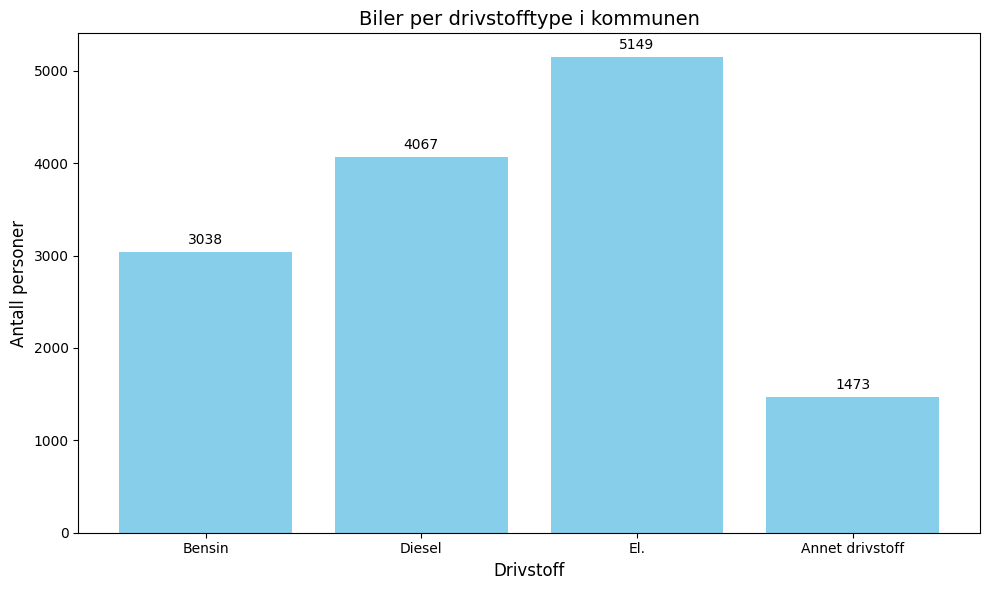

In [1237]:
# oppgave 8)

# Her lager vi et nytt datasett som inneholder dataene fra CSV-filen, med semikolon som skilletegn, og lagrer det i et datasett
filbane_biler = 'typer-av-biler-i-kommune.csv'
biler_df = pd.read_csv(filbane_biler, sep=';')

# her renser vi kolonnenavnene i datasettet, fjerner mellomrom og spesialtegn
# str.replace() fjerne mellomrom og spesialtegn fra kolonnenavnene, for å gjøre dem lettere å bruke
# str.strip() fjerner mellomrom før og etter teksten
biler_df.columns = biler_df.columns.str.strip().str.replace('"', '')

# Her konverterer vi tallene i kolonnen '2024' til positive og numeriske (float)
# errors='coerce' gjør sånn at hvis det er noe feil med å konvertere til tall, så blir det til NaN (Not a Number)
biler_df['2024'] = pd.to_numeric(biler_df['2024'], errors='coerce')

# her definerer vi en funksjon som lager et stolpediagram basert på en kategori og en tallkolonne
# funksjonen tar inn: 
# - df: datasettet 
# - kategori_kolonne: hva som skal stå på x-aksen (f.eks. drivstofftype)
# - verdi_kolonne: hva som skal vises i høyden på stolpene (y-aksen, f.eks. antall biler)
# - tittel: overskrift på diagrammet
def tegn_stolpediagram(df, kategori_kolonne, verdi_kolonne, tittel="Stolpediagram"):
    plt.figure(figsize=(10, 6))  # plt.figure() lager et nytt plott med en størrelse på 10x6 tommer
    bars = plt.bar(df[kategori_kolonne], df[verdi_kolonne], color='skyblue') # bars = plt.bar() lager stolpene i plottet, der x-aksen er kategori og y-aksen er verdi, og lagreres i variabelen bars for vidre bruk

    plt.title(tittel, fontsize=14) # plt.title() lager en tittel til plottet
    plt.xlabel(kategori_kolonne, fontsize=12) # plt.xlabel() lager en tekst ved x-aksen (kategori)
    plt.ylabel("Antall personer", fontsize=12) # plt.ylabel() lager en tekst ved y-aksen (antall personer)
    plt.xticks(rotation= 0) # plt.xticks() roterer teksten ved x-aksen 0 grader, sånn at den blir lettere å lese

    # Legg til tall over stolpene
    # plt.text() brukes til å plassere tallet på toppen av hver stolpe
    #f'{int(yval)}' sørger for at vi viser verdien som heltall
    # get_x() + get_width()/2 plasserer teksten midt over stolpen
    for bar in bars:  # for bar in bars: går gjennom hver stolpe i plottet og legger til teksten over dem
        yval = bar.get_height() # bar.get_height() henter høyden (verdien) til hver stolpene
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f"{int(yval)}",  # yval + 50: plasserer teksten litt over stolpen, # f"{int(yval)}": viser verdien som et heltall
                 ha='center', va='bottom', fontsize=10) # ha='center' og va='bottom' plasserer teksten midt over stolpen, # fontsize=10: gjør teksten litt mindre sånn at den ikke blir for stor

    plt.tight_layout()
    plt.show()

# her kaller vi funksjonen tegn_stolpediagram() for å lage et stolpediagram
tegn_stolpediagram(biler_df, 'Drivstoff', '2024', tittel="Biler per drivstofftype i kommunen")

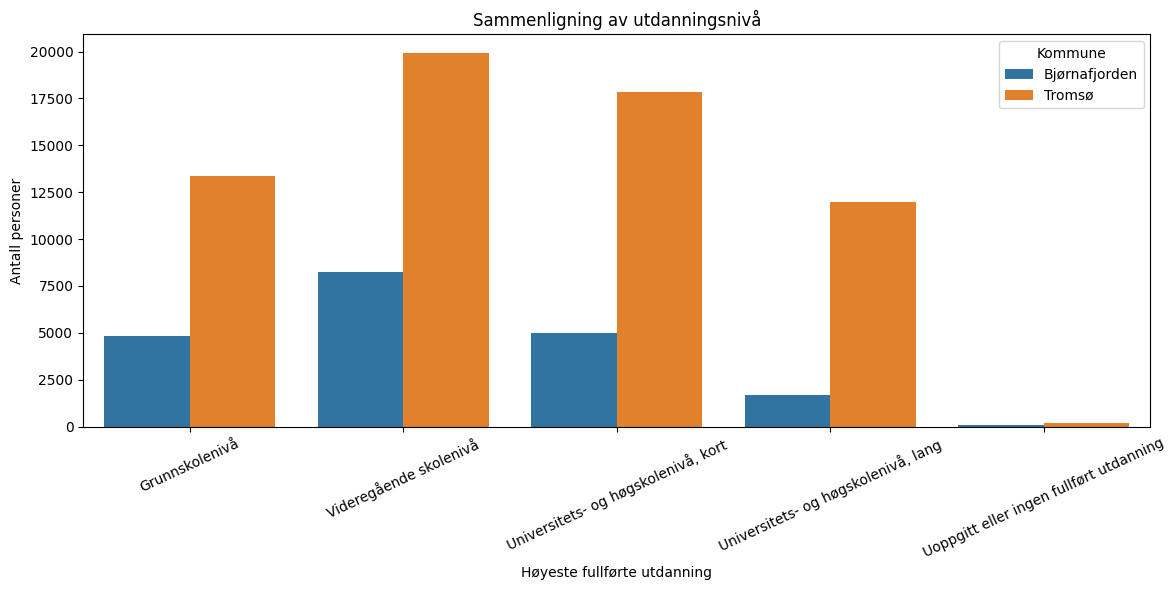

In [1238]:


# Her renser vi tromsø-dataene
# vi deler opp kolonnen som inneholder både utdanningsnivå og antall personer i to separate med semikolon som skilletegn
#expand=True gjør sånn at vi får to separate kolonner
utdaning_tromsø_df[['Utdanning', 'Antall']] = utdaning_tromsø_df['Utdanningsnivå;"Personer 16 år og over"'] \
    .str.split(';', expand=True)

# Vi konverterer 'Antall' til tall slik at vi kan bruke verdiene i beregninger og grafer
# vi gjør verdiene i kolonnen 'Antall' til positive og numeriske (float), 
utdaning_tromsø_df['Antall'] = pd.to_numeric(utdaning_tromsø_df['Antall'])
# Vi legger til en ny kolonne kalt 'Kommune' og fyller den med navnet 'Tromsø'
utdaning_tromsø_df['Kommune'] = 'Tromsø'
# her velger vi kun de træ nødvendige kolonnene for vidre bruk
utdaning_tromsø_df = utdaning_tromsø_df[['Utdanning', 'Antall', 'Kommune']]
# Denne koden gjør dataen fra Tromsø klar til sammenligning med andre kommuner ved å:
# 1. Konverterer tekst til tall
# 2. Legger til kommunenavn
# 3. Velger ut relevante kolonner


# # her renser vi bjørnefjorden-dataene
utdaning_df['Kommune'] = 'Bjørnafjorden'
# vi velger bare de nødvendige kolonnene for vidre bruk
utdaning_df = utdaning_df[['Utdanningsnivå', 'Antall', 'Kommune']]
# her gjør vi om 'utdaningsnivå' til 'utdanning', slik at det matcher Tromsø-dataene sånn at vi kan sammenligne dem
utdaning_df.columns = ['Utdanning', 'Antall', 'Kommune']

# her slår vi sammen dataene fra bjørnafjorden og tromsø til ett felles datasett, sånn at vi kan bruke det til å lage et diagram
sammen_df = pd.concat([utdaning_df, utdaning_tromsø_df])

# her lager vi et søylediagram med flere søyler
# plt.figure() lager et nytt plott med en størrelse på 12x6 tommer
plt.figure(figsize=(12, 6))
# sns.barplot() tegner stolpediagrammet med:
# 1 x-aksen som 'Utdanning'
# 2 y-aksen som 'Antall'
# 3 hue som 'Kommune' for å vise forskjellen mellom kommunene (lager forskjellige farger for hver kommune)
sns.barplot(data=sammen_df, x='Utdanning', y='Antall', hue='Kommune')

# plt.title() lager en tittel til plottet
plt.title("Sammenligning av utdanningsnivå")
# plt.ylabel() lager en tekst ved y-aksen (antall personer)
plt.ylabel("Antall personer")
# plt.xlabel() lager en tekst ved x-aksen (utdanning)
plt.xlabel("Høyeste fullførte utdanning")
# plt.xticks() roterer teksten ved x-aksen 25 grader, sånn at den blir lettere å lese
plt.xticks(rotation=25)
# her gjør vi sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# her viser vi plottet
plt.show()

In [1239]:
# Summer personer i hver sektor

# vi grupperer etter 'sektor', og summerer antall personer i hver sektor
sektor_kommune = jobb_df.groupby('Sektor')['Antall'].sum().reset_index()
# vi legger til en ny kolonne kalt 'kommune' og fyller inn med navnet 'Bjørnafjorden'
sektor_kommune['Kommune'] = 'Bjørnafjorden'

In [1240]:
# Del opp sammenslått kolonne
# Her bearbeider vi Tromsø-dataene for å kunne sammenligne sektorfordeling med Bjørnafjorden
# i kolonnen 'Næring;"2020"' ligger både næring og antall sammen, delt med semikolon
# vi deler opp kolonnen i to separate kolonner, 'Næring' og 'Antall', ved å bruke str.split() og expand=True
jobb_tromsø_df[['Næring', 'Antall']] = jobb_tromsø_df['Næring;"2020"'].str.split(';', expand=True)
# her konventerer vi 'antall' kolonnen til numeriske verdier
jobb_tromsø_df['Antall'] = pd.to_numeric(jobb_tromsø_df['Antall'])

# Legg til Sektor-kolonne (basert på næring)
# vi går gjennom hver verdi i 'Næring'-kolonnen, og hvis verdien er en av de offentlige næringene
# settes 'Sektor' til 'Offentlig', ellers blir det 'Privat'
jobb_tromsø_df['Sektor'] = jobb_tromsø_df['Næring'].apply(lambda x: 'Offentlig' if x in [
    'Off.adm., forsvar, sosialforsikring',
    'Undervisning',
    'Helse- og sosialtjenester'
] else 'Privat')

# Summer Tromsø etter sektor
# her grupperer vi dataene etter sektor og summerer antall personer i hver sektor
# reset_index() gjør sånn at vi får en ny indeks i datasettet
# reset_index() gjør at resultatet ikke lenger har 'Sektor' som indeks – det gjør det lettere å jobbe videre med som DataFrame
sektor_tromsø = jobb_tromsø_df.groupby('Sektor')['Antall'].sum().reset_index()
# her legger vi til en ny kolonne kalt 'kommune' og fyller inn med navnet 'Tromsø'
sektor_tromsø['Kommune'] = 'Tromsø'
# Etter dette steget:
# Nå har vi to datasett (ett for Tromsø og ett for Bjørnafjorden) som begge inneholder:
# - Sektor (Offentlig eller Privat)
# - Antall personer i hver sektor
# - Kommune
# Disse er klare til å slås sammen og plottes i en sammenlignende graf.

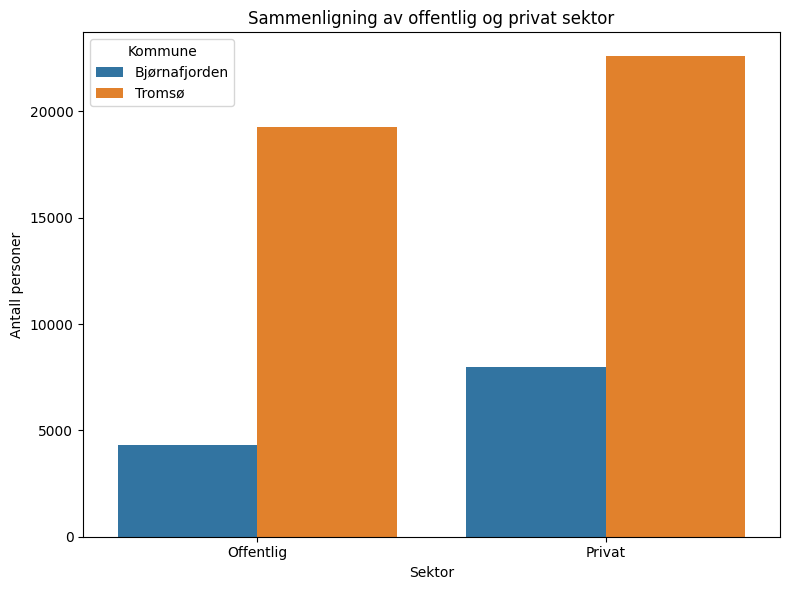

In [1241]:
# her slår vi sammen sektor-dataene fra bjørnafjorden og tromsø til ett felles datasett(sektor_sammen), sånn at vi kan bruke det til å lage et diagram
# pd.concat() brukes til å slå sammen de to datasettene (sektor_kommune og sektor_tromsø), slik at vi får ett datasett (sektor_sammen) som inneholder dataene fra begge kommunene
sektor_sammen = pd.concat([sektor_kommune, sektor_tromsø])

# Plot
# plt.figure() lager et nytt plott med en størrelse på 8x6 tommer
plt.figure(figsize=(8, 6))
# sns.barplot() lager stolpediagram:
# 1. x-aksen viser 'Sektor' (Offentlig/Privat)
# 2. y-aksen viser 'Antall' personer
# 3. hue='Kommune' gir ulik farge for hver kommune
sns.barplot(data=sektor_sammen, x='Sektor', y='Antall', hue='Kommune')

# plt.title() lager en tittel til plottet
plt.title('Sammenligning av offentlig og privat sektor')
# her legger vi til tekst ved y-aksen
plt.ylabel('Antall personer')
# her legger vi til tekst ved x-aksen
plt.xlabel('Sektor')
# her gjør vi sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# her viser vi plottet
plt.show()

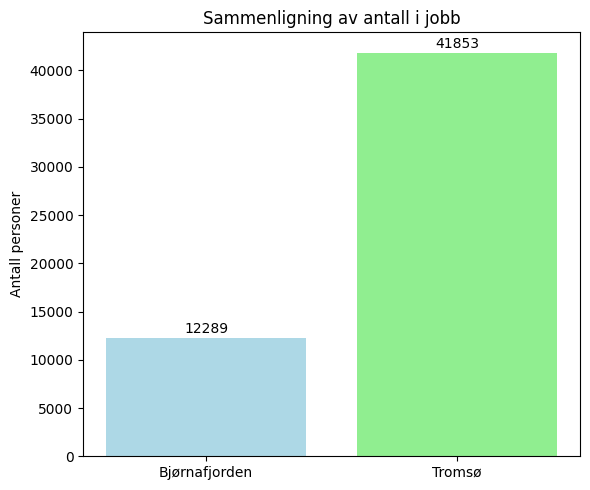

In [1242]:
# Summer antall personer i jobb for begge kommuner
# her summerer vi totalt antall personer i jobb for hver kommune (Bjørnafjorden og Tromsø), ved å bruke .sum() til å summere verdiene i kolonnen 'Antall'
# reusltatet lagres i variabler (totalt_kommune og totalt_tromsø)
totalt_kommune = jobb_df['Antall'].sum()
totalt_tromsø = jobb_tromsø_df['Antall'].sum()

# her lager vi et nytt datasett (arbeid_df) med sammenlignbare data
# det nye datasettet inneholder to kolonner:
# 1. 'Kommune' som viser navnene på kommunene (Bjørnafjorden og Tromsø)
# 2. 'Antall i jobb' som viser totalt antall personer i jobb i hver kommune
arbeid_df = pd.DataFrame({
    'Kommune': ['Bjørnafjorden', 'Tromsø'],
    'Antall i jobb': [totalt_kommune, totalt_tromsø]
})

# Her lager vi et søylediagram
# plt.figure() lager et nytt plott med en størrelse på 6x5 tommer
plt.figure(figsize=(6, 5))
# plt.bar() lager stolpene i plottet, der x-aksen er kommune og y-aksen er antall personer i jobb, og lagrer det i variabelen bars for vidre bruk
# color=['lightblue', 'lightgreen'] gir forskjellige farger til stolpene for hver kommune
bars = plt.bar(arbeid_df['Kommune'], arbeid_df['Antall i jobb'], color=['lightblue', 'lightgreen'])

# her legge vi til verdier over stolpene 
# get_height() henter høyden (verdien) til hver stolpe
# get_x() og get_width() brukes til å finne posisjonen til stolpen, sånn at teksten blir plassert rett over stolpen
# plt.text() brukes til å plassere tallet på toppen av hver stolpe
# yval + 200: plasserer teksten litt over stolpen, sånn at den ikke overlapper med selve stolpen
# f'{int(yval)}': viser verdien som et heltall
# ha='center' og va='bottom' plasserer teksten midt over stolpen
# fontsize=10: gjør teksten litt mindre sånn at den ikke blir for stor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{int(yval)}',
             ha='center', va='bottom', fontsize=10)


# her legger vi til en tittel til plottet
plt.title('Sammenligning av antall i jobb')
# her legger vi til tekst ved y-aksen
plt.ylabel('Antall personer')
# her gjør vi sånn at ingen ting overlapper med hverandre i plottet
plt.tight_layout()
# her viser vi plottet
plt.show()